# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.52e-06
Time:                        23:01:21   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.023     13.166      0.0

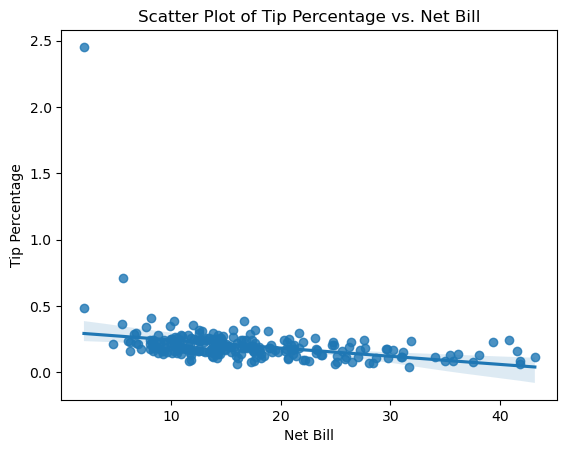

In [3]:
tips = sns.load_dataset("tips")

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])


tips['net_bill'] = tips['total_bill'] - tips['tip']


X = tips['net_bill']
X = sm.add_constant(X)
y = tips['tip_pct']
model_tip_pct = sm.OLS(y, X).fit()


print(model_tip_pct.summary())


sns.regplot(y='tip_pct', x='net_bill', data=tips)


plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Scatter Plot of Tip Percentage vs. Net Bill')
plt.show()


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.62e-13
Time:                        23:02:06   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6181      0.054     11.444   

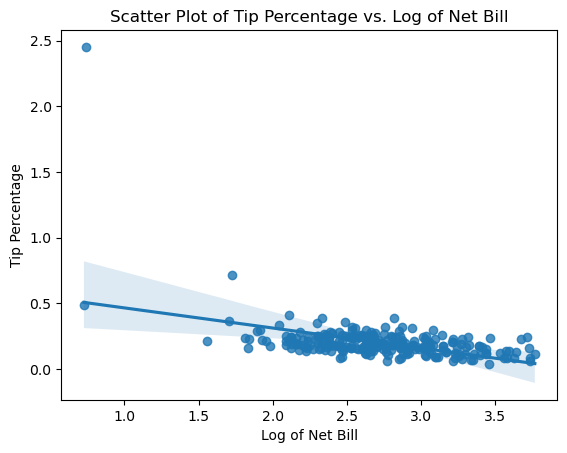

In [5]:
tips['log_net_bill'] = np.log(tips['net_bill'])


X = tips['log_net_bill']
X = sm.add_constant(X)
y = tips['tip_pct']
model_tip_pct_log = sm.OLS(y, X).fit()


print(model_tip_pct_log.summary())

sns.regplot(y='tip_pct', x='log_net_bill', data=tips)


plt.xlabel('Log of Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Scatter Plot of Tip Percentage vs. Log of Net Bill')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.06e-09
Time:                        23:02:49   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4851      0.047  

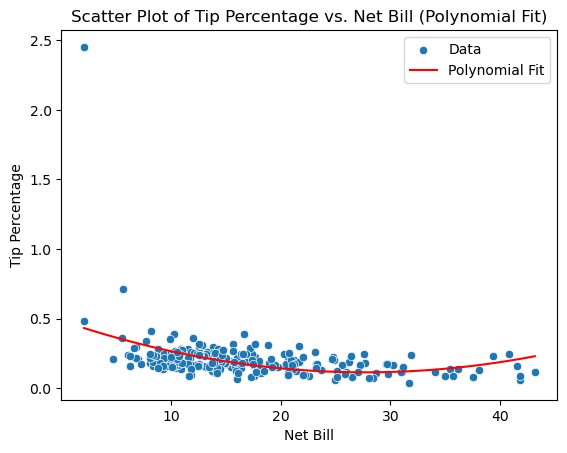

In [7]:
tips['net_bill_squared'] = tips['net_bill'] ** 2


X = tips[['net_bill', 'net_bill_squared']]
X = sm.add_constant(X)
y = tips['tip_pct']
model_tip_pct_poly = sm.OLS(y, X).fit()

print(model_tip_pct_poly.summary())


sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Data')
x_range = np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 100)
y_range = model_tip_pct_poly.params['const'] + model_tip_pct_poly.params['net_bill'] * x_range + model_tip_pct_poly.params['net_bill_squared'] * (x_range ** 2)
plt.plot(x_range, y_range, color='red', label='Polynomial Fit')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Scatter Plot of Tip Percentage vs. Net Bill (Polynomial Fit)')
plt.legend()
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           8.27e-16
Time:                        23:04:20   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2749      0.056    -22.872      0.0

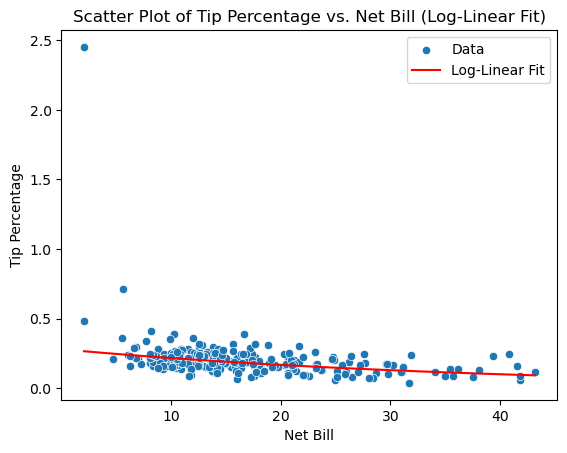

In [13]:
tips['log_tip_pct'] = np.log(tips['tip_pct'])


X = tips['net_bill']
X = sm.add_constant(X)
y = tips['log_tip_pct']
model_log_tip_pct = sm.OLS(y, X).fit()


print(model_log_tip_pct.summary())

pred_log_tip_pct = model_log_tip_pct.fittedvalues


pred_tip_pct = np.exp(pred_log_tip_pct)


r2_tip_pct = r2_score(tips['tip_pct'], pred_tip_pct)
print(f'R² do modelo predito para tip_pct: {r2_tip_pct:.4f}')


sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Data')
x_range = np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 100)
y_range = np.exp(model_log_tip_pct.params['const'] + model_log_tip_pct.params['net_bill'] * x_range)
plt.plot(x_range, y_range, color='red', label='Log-Linear Fit')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Scatter Plot of Tip Percentage vs. Net Bill (Log-Linear Fit)')
plt.legend()
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           5.20e-20
Time:                        23:05:12   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3942      0.133     -2.961   

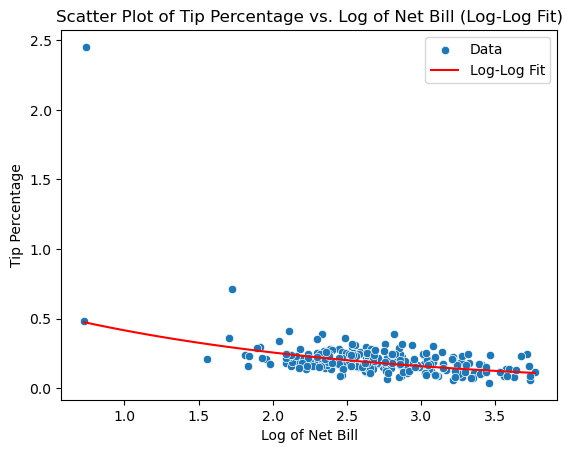

In [15]:
tips = tips[tips['net_bill'] > 0]


tips['log_tip_pct'] = np.log(tips['tip_pct'])

tips['log_net_bill'] = np.log(tips['net_bill'])


X = tips['log_net_bill']
X = sm.add_constant(X)
y = tips['log_tip_pct']
model_log_log = sm.OLS(y, X).fit()


print(model_log_log.summary())


pred_log_tip_pct = model_log_log.fittedvalues


pred_tip_pct = np.exp(pred_log_tip_pct)

r2_tip_pct = r2_score(tips['tip_pct'], pred_tip_pct)
print(f'R² do modelo predito para tip_pct: {r2_tip_pct:.4f}')


sns.scatterplot(x='log_net_bill', y='tip_pct', data=tips, label='Data')
x_range = np.linspace(tips['log_net_bill'].min(), tips['log_net_bill'].max(), 100)
y_range = np.exp(model_log_log.params['const'] + model_log_log.params['log_net_bill'] * x_range)
plt.plot(x_range, y_range, color='red', label='Log-Log Fit')
plt.xlabel('Log of Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Scatter Plot of Tip Percentage vs. Log of Net Bill (Log-Log Fit)')
plt.legend()
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [ ]:
# Modelo do exercicios 5 é o melhor e maior por possuir o melhor R-squared